<a href="https://colab.research.google.com/github/Mathuritika/Assignment-two/blob/main/ritika_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Path to dataset files: /root/.cache/kagglehub/datasets/artimule/drinking-water-probability/versions/1
Dataset downloaded and unzipped.
Naive Bayes: Accuracy: 0.5391 (+/- 0.0266)
Decision Tree: Accuracy: 0.6271 (+/- 0.0436)
Random Forest: Accuracy: 0.7353 (+/- 0.0245)
SVM: Accuracy: 0.4975 (+/- 0.0406)
KNN: Accuracy: 0.6643 (+/- 0.0436)

Test Set Evaluation:
Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1-Score: 0.73
AUC Score: 0.73
Cohen's Kappa: 0.45999999999999996


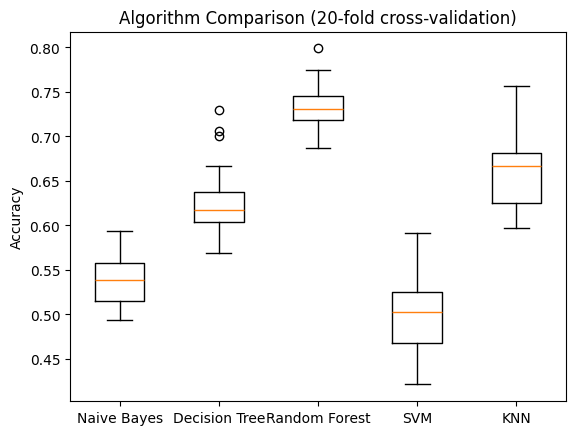


Confusion Matrix:
[[292 108]
 [108 292]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73       400
         1.0       0.73      0.73      0.73       400

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800

Silhouette Score for k=3: 0.3343


In [ ]:
import kagglehub
import matplotlib.pyplot as plt


#Downloading
path = kagglehub.dataset_download("artimule/drinking-water-probability")

print("Path to dataset files:", path)
!pip install kaggle
import os

# Specifying the dataset path
dataset_path = "artimule/drinking-water-probability"

# Downloading the dataset
os.system(f"kaggle datasets download -d {dataset_path} --unzip")

print("Dataset downloaded and unzipped.")
import pandas as pd
import json

import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB  # Import Naive Bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, cohen_kappa_score

# Loading the dataset
df = pd.read_csv("drinking_water_potability.csv")

#Handling missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

#Splitting dataset into features X and target Y
target_column = "Potability"
X = df_imputed.drop(columns=[target_column])
y = df_imputed[target_column]

#Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

#Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42)

#Dimensionality Reduction by PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for clustering
X_reduced = pca.fit_transform(X_train)

#Defining the models
models = [
    ('Naive Bayes', GaussianNB()),  # Use Naive Bayes instead of Logistic Regression
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(gamma='auto', kernel='linear')),
    ('KNN', KNeighborsClassifier())  # Add KNN model
]

#Cross validation and evaluation using K-Fold
kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Accuracy: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})")

#Selecting the best model (example: Random Forest)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

#Predictions on the test data
y_test_pred = best_model.predict(X_test)

#Evaluating the model on the test data
print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1-Score:", f1_score(y_test, y_test_pred))
print("AUC Score:", roc_auc_score(y_test, y_test_pred))
print("Cohen's Kappa:", cohen_kappa_score(y_test, y_test_pred))



#Boxplot for algorithm comparison
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison (20-fold cross-validation)')
plt.ylabel('Accuracy')
plt.show()

#Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

#Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#KMeans Clustering and Silhouette Score Evaluation
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_reduced)
sil_score = silhouette_score(X_reduced, kmeans.labels_)
print(f"Silhouette Score for k={k}: {sil_score:.4f}")

In [ ]:
import shap

# SHAP Explanation
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Example: SHAP explanation for the first instance
instance_index = 0
shap_values_instance = shap_values[instance_index]

X_test = pd.DataFrame(X_test, columns=X.columns)

# SHAP Explanation
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Example: SHAP explanation for the first instance
instance_index = 0
shap_values_instance = shap_values[instance_index]